# Health Indicators - Diabetes 

**Context**

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.
Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.
The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly $327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annuall









Data set can be found at this URL https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4/about_data


### Import Libraries

In [2]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cuda GPU Accelerator Libraries
#!pip install pandas scikit-learn
# For GPU acceleration (if you have a compatible NVIDIA GPU and CUDA installed)
#!pip install cuml

In [3]:
# Set CUDA_VISIBLE_DEVICES to utilize all available GPUs
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Replace "0" with the index of your GPU if you have multiple GPUs
print("Cuda device Visible.")

# Set CUDA_HOME environment variable
os.environ['CUDA_HOME'] = r'C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v12.4'  # Replace with your CUDA installation path

# Append CUDA bin directory to PATH
os.environ['PATH'] += ';' + os.path.join(os.environ['CUDA_HOME'], 'bin')
print("CUDA environment variables configured successfully.")

Cuda device Visible.
CUDA environment variables configured successfully.


In [4]:
#pip list

## Read CSV File

In [5]:
import pandas as pd
#file_path = r'C:\Users\casal\OneDrive\Desktop\Documents\1- Data Science Stuff\Projects\Health Indicators\diabetes_012_health_indicators_BRFSS2015.csv'


file_path = r'C:\Users\casal\OneDrive\Desktop\Documents\1- Data Science Stuff\Projects\Health Indicators\diabetes_012_health_indicators_BRFSS2015.csv'

# Read the CSV file in chunks if chunk_size is specified
raw_data = pd.read_csv(file_path, dtype={3: 'str'})  # For example, force column 3 to be read as string

## 1. Initial Data Inspection


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  object 
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

### 1.1 Correcting Data Types to Integer for Visualization

In [7]:
# We will convert all columns to integers except 'Age', 'Education', and 'Income'
#convert 'CholCheck' from string to float
raw_data['CholCheck'] = raw_data['CholCheck'].astype(float)

# Get a list of all column names
all_columns = raw_data.columns.tolist()

# Define the columns to exclude from conversion
columns_to_exclude = ['Age', 'Education', 'Income']

# List of columns to convert is all columns except the ones to exclude
columns_to_convert = [column for column in all_columns if column not in columns_to_exclude]

# Convert each column to integer, handling NaN values by replacing them with a default integer (e.g., -1)
for column in columns_to_convert:
    raw_data[column] = raw_data[column].fillna(-1).astype(int)

# Now the dataframe has all columns as integers except 'Age', 'Education', and 'Income'

In [8]:
raw_data.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9.0,4.0,3.0
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7.0,6.0,1.0
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9.0,4.0,8.0
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11.0,3.0,6.0
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11.0,5.0,4.0


In [9]:
#Heat Map Code - Color palete mako or crest

## Cluster Map of data

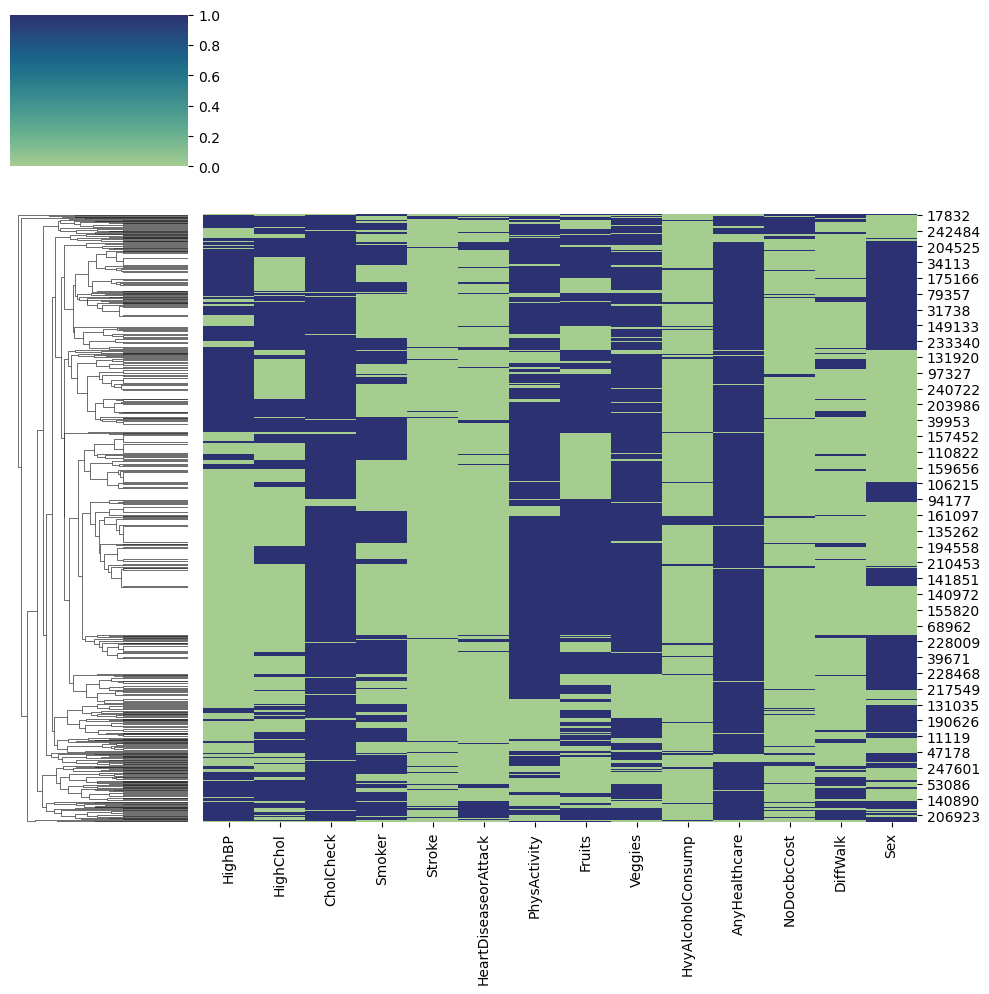

In [10]:
# Assuming raw_data is your pandas DataFrame

# Step 1: Filter out binary columns
binary_columns = raw_data.select_dtypes(include=['number']).apply(lambda x: x.isin([0, 1]).all())

# Select only binary columns for visualization
binary_data = raw_data.loc[:, binary_columns]

# Step 2: Sample a subset of the data for visualization
sampled_data = binary_data.sample(n=min(1000, len(binary_data)), random_state=42)

# Step 3: Create and display the cluster map
sns.clustermap(sampled_data, method='average', cmap='crest', figsize=(10, 10), col_cluster=False)

# Adjust the layout so the plot is not cut off
plt.tight_layout()

# Show the plot
plt.show()

## Bar charts for binary data

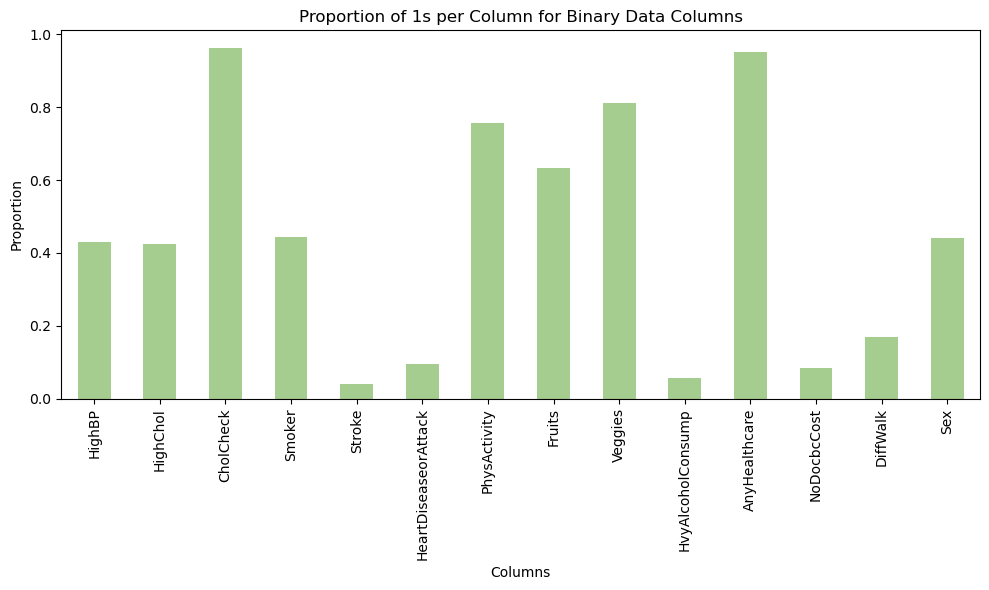

In [11]:
import gc

# Filter columns: include only those where all values are 0 or 1
filtered_columns = raw_data.columns[(raw_data <= 1).all()]
filtered_data = raw_data[filtered_columns]

# Calculate the proportion of 1s for each column efficiently in 'filtered_data'
proportions = filtered_data.mean(axis=0)

# Explicitly prompt garbage collection (optional, might be useful in a larger pipeline of operations)
gc.collect()

# Plot using the 'crest' colormap
ax = proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

# Add titles and labels
plt.title('Proportion of 1s per Column for Binary Data Columns')  # Chart title
plt.xlabel('Columns')  # X-axis title
plt.ylabel('Proportion')  # Y-axis title

# Tighten layout
plt.tight_layout()

# Note: The legend might not be directly applicable if your bar plot doesn't represent multiple groups/categories within each column.


## Stacked Box plots for non-binary data

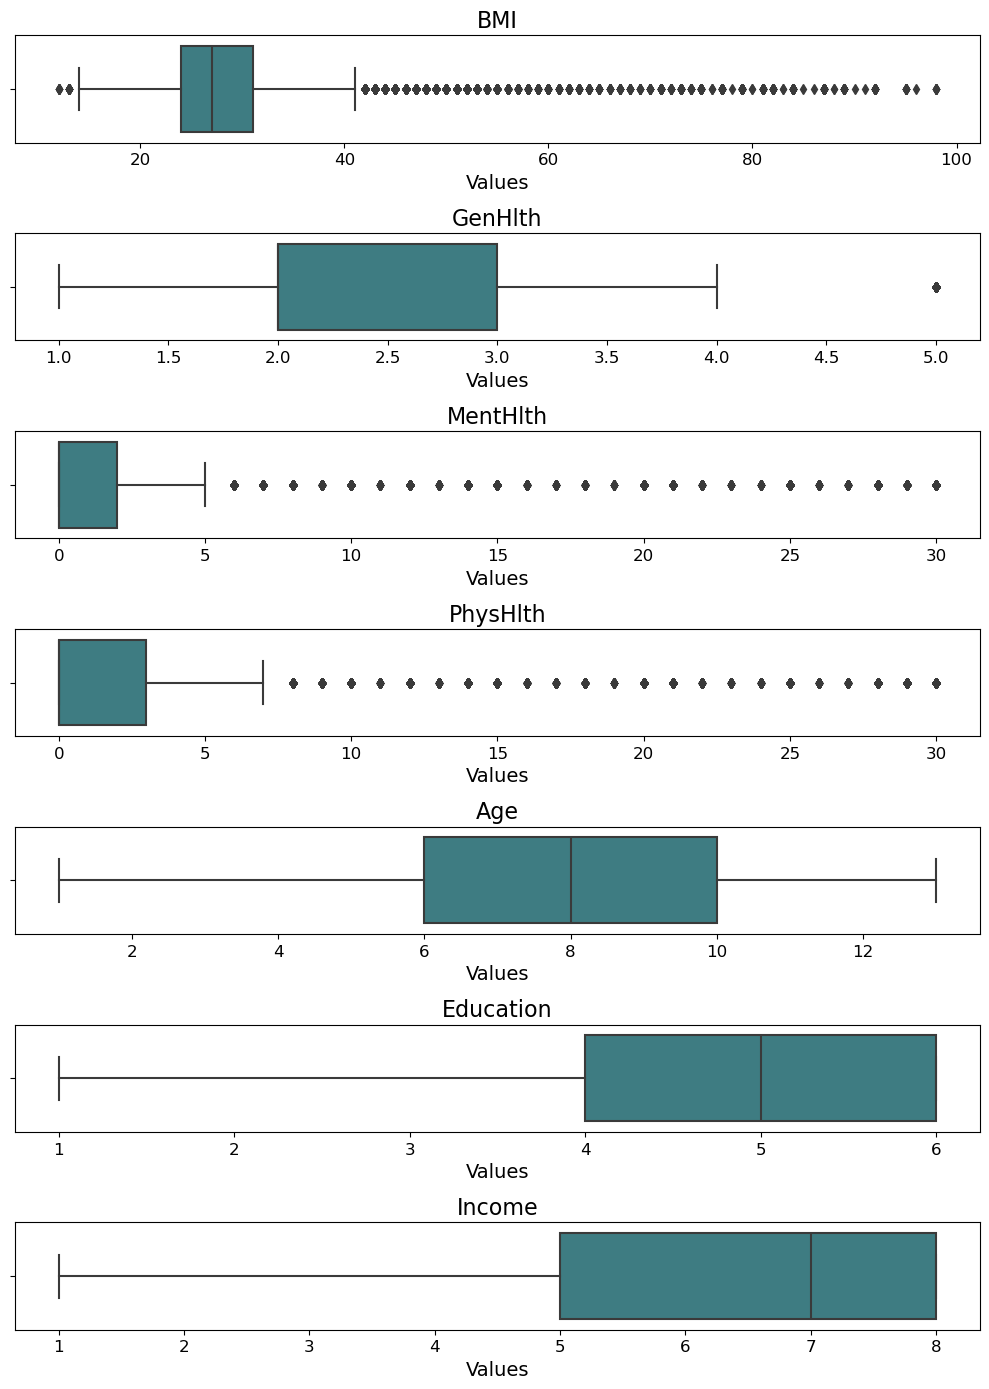

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'raw_data' is your DataFrame and is already loaded

# Filter columns: exclude those where all values are 0 or 1 (binary)
non_binary_columns = raw_data.columns[
    ~(raw_data.isin([0, 1]).all()) & (raw_data.columns != 'Diabetes_012')]

#non_binary_columns = raw_data.columns[~(raw_data.isin([0, 1]).all())]
non_binary_data = raw_data[non_binary_columns]

# Determine the number of non-binary columns to create an appropriate number of subplots
num_non_binary_columns = len(non_binary_columns)

# Create a figure and an array of subplots with 1 column and as many rows as there are non-binary columns
fig, axes = plt.subplots(num_non_binary_columns, 1, figsize=(10, num_non_binary_columns * 2))

# If there is only one non-binary column, axes will not be an array, so we wrap it in a list for consistency in handling
if num_non_binary_columns == 1:
    axes = [axes]

# Plot each non-binary column on its own subplot
for i, col in enumerate(non_binary_columns):
    sns.boxplot(x=non_binary_data[col], ax=axes[i], palette='crest')
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('Values', fontsize=14)
    axes[i].tick_params(axis='x', labelsize=12)  # Adjust x-ticks label size if needed

# Adjust layout for better readability and to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()


## Bar chart for Target variable 

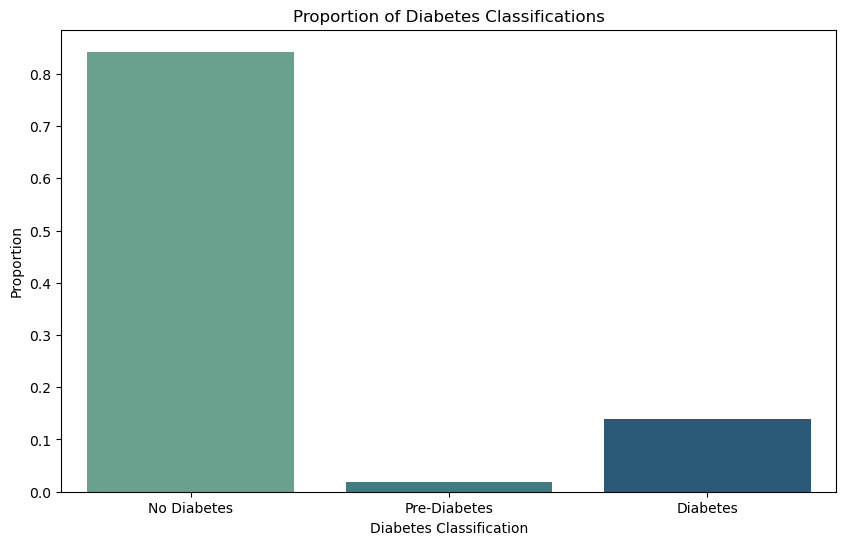

In [28]:
# Assuming 'raw_data' is your DataFrame
# Calculate the proportion of each unique value
value_counts = raw_data['Diabetes_012'].value_counts(normalize=True).reset_index()
#value_counts = raw_data['Diabetes_012'].value_counts().reset_index()
value_counts.columns = ['Diabetes_Classification', 'Proportion']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes_Classification', y='Proportion', data=value_counts, palette='crest')

# Adding chart details
plt.title('Proportion of Diabetes Classifications')
plt.xlabel('Diabetes Classification')
plt.ylabel('Proportion')
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre-Diabetes', 'Diabetes']) # Adjust labels as necessary

plt.show()


## Statistics on Non Binary Features

In [12]:
# First, let's identify columns with non-binary values
non_binary_columns = [col for col in raw_data.columns if len(raw_data[col].unique()) > 2]

# Now, let's perform describe on those columns
describe_non_binary = raw_data[non_binary_columns].describe(include='all')

# Print the summary statistics
describe_non_binary

,Diabetes_012,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,0.698160,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,0.000000,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,2.000000,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


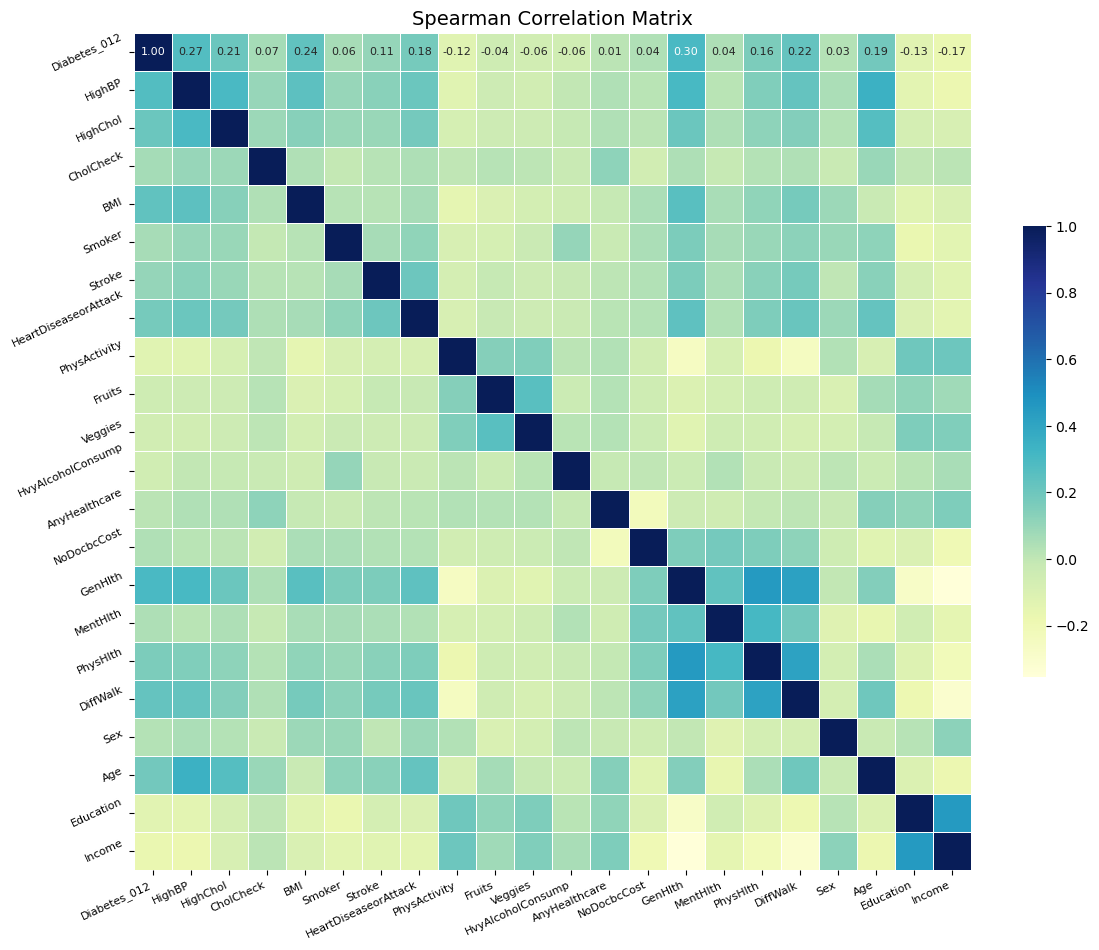

In [25]:
# Calculate the Spearman correlation matrix
corr_matrix = raw_data.corr(method='spearman')

# Visualize the correlation matrix using seaborn with the YlGnBu color palette
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', 
            cbar=True, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot_kws={"size": 8})

# Adjust font size for xticks and yticks to make them more legible but smaller than the title
plt.xticks(rotation=25, ha='right', fontsize=8)  # Smaller font size for xticks
plt.yticks(rotation=25, fontsize=8)  # Smaller font size for yticks

# Specify a larger font size for the title for emphasis
plt.title('Spearman Correlation Matrix', fontsize=14)  # Larger font size for the title
plt.tight_layout()
plt.show()

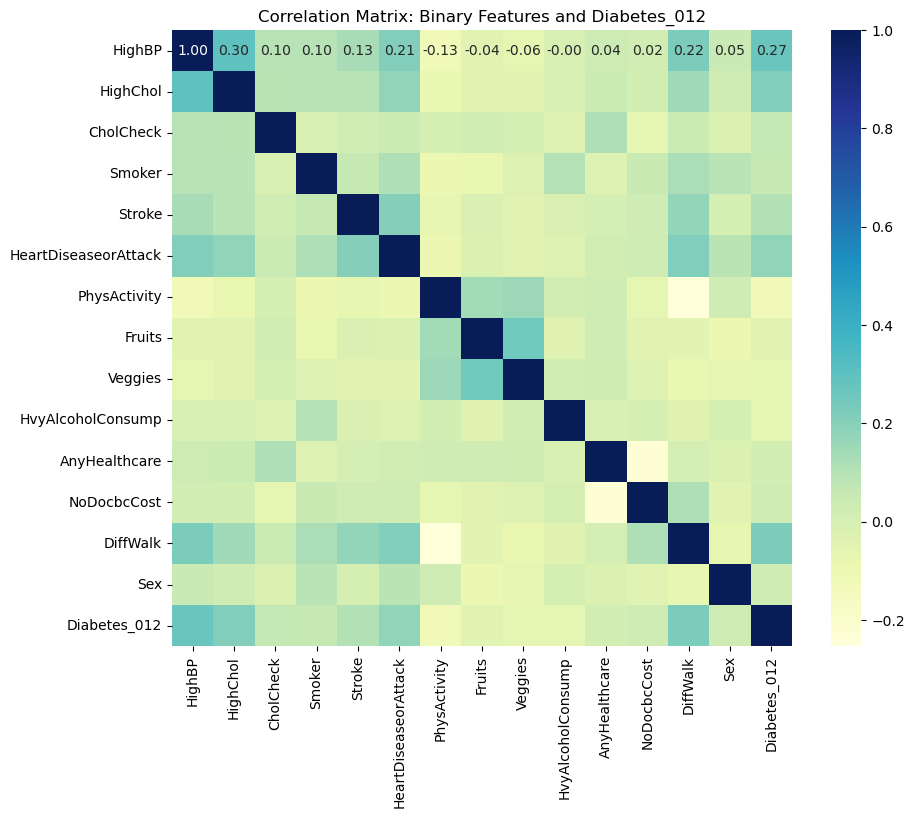

In [26]:
# Filter binary columns
binary_columns = raw_data.columns[(raw_data <= 1).all()]

# Include both binary columns and target feature in the DataFrame
selected_columns = binary_columns.append(pd.Index(['Diabetes_012']))
binary_data_with_target = raw_data[selected_columns]

# Calculate correlation matrix
corr_matrix = binary_data_with_target.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix: Binary Features and Diabetes_012')
plt.show()


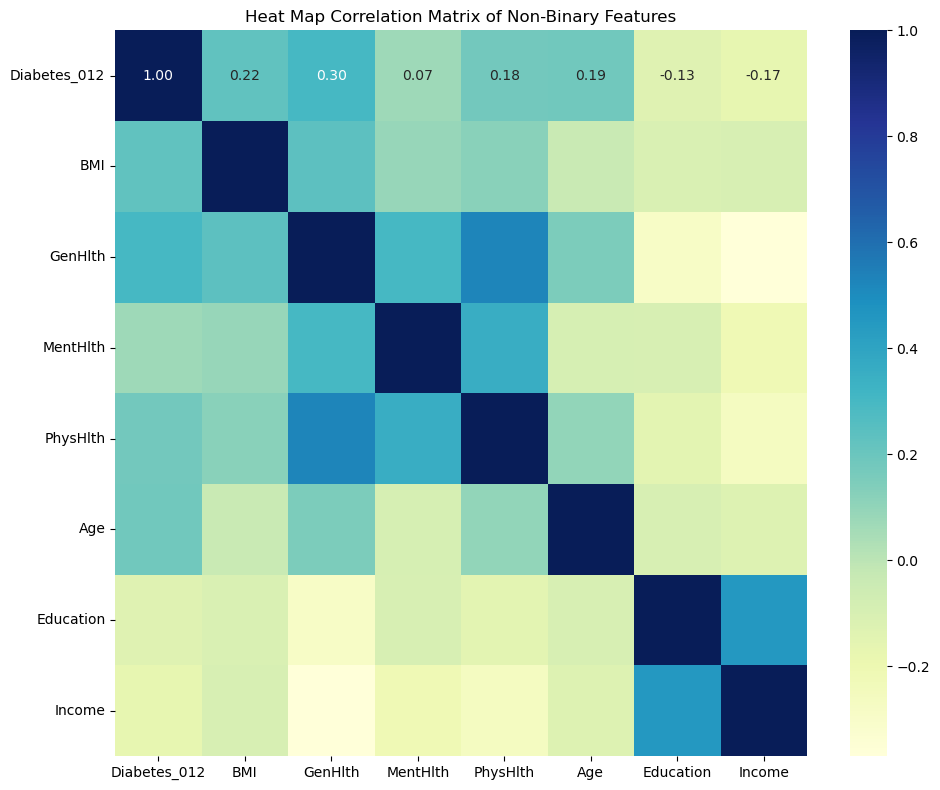

In [15]:
# Assuming 'raw_data' is your DataFrame
# Filter out binary features. We consider a feature binary if it has only two unique values, 0 and 1.
non_binary_columns = [col for col in raw_data.columns if not set(raw_data[col].unique()).issubset({0, 1})]
non_binary_data = raw_data[non_binary_columns]

# Calculate the correlation matrix for non-binary features only, including the target variable 'Diabetes_012'
correlation_matrix = non_binary_data.corr()

# Create the heatmap with seaborn
plt.figure(figsize=(10, 8))  # Adjust size to fit your display preferences
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heat Map Correlation Matrix of Non-Binary Features')

# Adjust label rotation and layout.
plt.xticks(rotation='horizontal')
plt.yticks(rotation='horizontal')

# Improve layout by automatically adjusting subplot parameters.
plt.tight_layout()
plt.show()

## Recursive Feature Elimination

### For XGBoost and Gradient Boosting Models

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier

# Assuming raw_data is your DataFrame
y = raw_data['Diabetes_012']
X = raw_data.drop('Diabetes_012', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the classifier with GPU support
clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='hist', device='cuda')

# Scoring metric for multiclass F1 Score
f1_scorer = make_scorer(f1_score, average='macro')

# Perform RFECV
selector = RFECV(estimator=clf, step=1, cv=5, scoring=f1_scorer)
selector = selector.fit(X_train_scaled, y_train)

# Identify and print the top features
top_features = X_train.columns[selector.support_]
print("Top features selected by RFECV:", top_features[:10])

# Evaluate the model with the selected features on the test set
y_pred = selector.predict(X_test_scaled)
f1 = f1_score(y_test, y_pred, average='macro')
#print("F1 Score with selected features:", f1)

C:\Users\casal\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:43:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Top features selected by RFECV: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump'],
      dtype='object')
F1 Score with selected features: 0.4031433252225803


In [20]:
# Assuming 'raw_data' is your existing DataFrame
selected_columns = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
                    'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump','Diabetes_012']

# Selecting the specified columns to create a new DataFrame
xgb_10_df = raw_data[selected_columns].copy()

# 'new_data' now contains only the selected columns from 'raw_data'
xgb_10_df.head(2)
print(xgb_10_df.shape)

(253680, 11)


In [34]:
xgb_10_df.head(2)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,Fruits,Veggies,HvyAlcoholConsump,Diabetes_012
0,1,1,1,40,1,0,0,0,1,0,0
1,0,0,0,25,1,0,0,0,0,0,0


C:\Users\casal\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\casal\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:15:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


F1 Score (Weighted): 0.7975946066180223
Precision (Weighted): 0.7947798474350576
Recall (Weighted): 0.8462432986439609


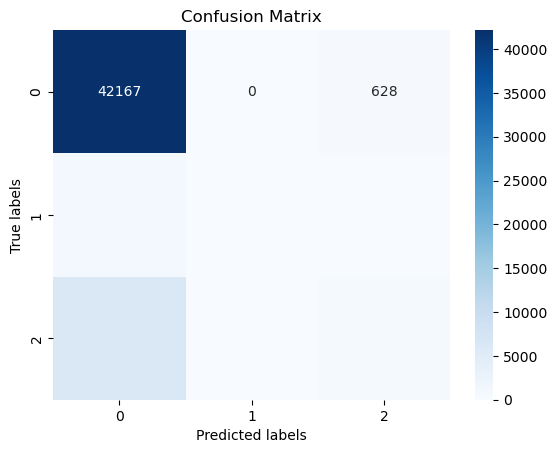

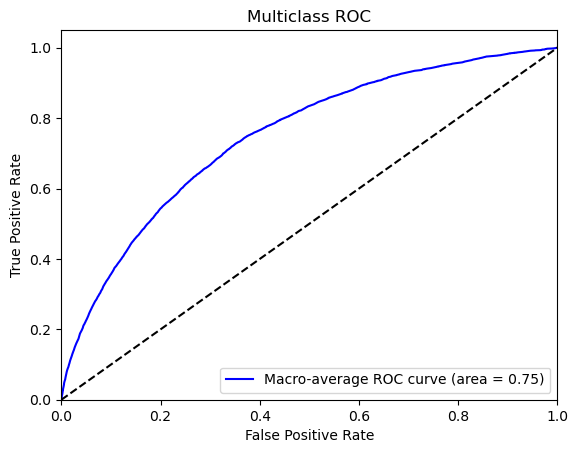

In [21]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming xgb_10_df is your DataFrame and already cleaned
y = xgb_10_df['Diabetes_012']
X = xgb_10_df.drop('Diabetes_012', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an XGB classifier model
xgb_model = xgb.XGBClassifier(objective='multi:softprob', tree_method='hist', predictor='gpu_predictor', device='cuda', num_class=3)
xgb_model.fit(X_train_scaled, y_train)

# Predictions for evaluation
y_pred = xgb_model.predict(X_test_scaled)
y_pred_proba = xgb_model.predict_proba(X_test_scaled)

# Scoring metrics
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1}")
print(f"Precision (Weighted): {precision}")
print(f"Recall (Weighted): {recall}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Binarize the output for ROC AUC computation
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Plot the ROC curve
plt.figure()
plt.plot(all_fpr, mean_tpr, color='blue',
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()

## SVM RFE 

In [24]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

# Assuming 'raw_data' is a pandas DataFrame with features and target variable 'Diabetes_binary'

# Splitting data into features and target
X = raw_data.drop(columns=['Diabetes_binary'])
y = raw_data['Diabetes_binary']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define SVC classifier with linear kernel
svc = SVC(kernel='linear')

# Perform Recursive Feature Elimination with Cross-Validation
selector = RFECV(estimator=svc, step=1, cv=5, scoring='f1_score')
selector.fit(X_train_scaled, y_train)

# Print selected features
print("Selected Features:", X_train.columns[selector.support_])
print("Feature Ranking:", selector.ranking_)
print("Accuracy Score:", accuracy_score(y_test, selector.predict(X_test_scaled)))

Selected Features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack',
       'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Income'],
      dtype='object')
Feature Ranking: [1 1 1 1 6 3 1 5 4 1 1 7 8 1 1 1 1 1 1 2 1]
Accuracy Score: 0.7478605276186435


## Neural Network RFE 

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'raw_data' is a pandas DataFrame with features and target variable 'Diabetes_binary'

# Splitting data into features and target
X = raw_data.drop(columns=['Diabetes_binary'])
y = raw_data['Diabetes_binary']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define MLPClassifier
mlp = MLPClassifier()

# Perform Recursive Feature Elimination with Cross-Validation
selector = RFECV(estimator=mlp, step=1, cv=5, scoring='accuracy')
selector.fit(X_train_scaled, y_train)

# Print selected features
print("Selected Features:", X_train.columns[selector.support_])
print("Feature Ranking:", selector.ranking_)
print("Accuracy Score:", accuracy_score(y_test, selector.predict(X_test_scaled)))